Light GBM beats all the other algorithms when the dataset is extremely large. Compared to the other algorithms, Light GBM takes lesser time to run on a huge dataset.


it is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. Also, it is surprisingly very fast, hence the word ‘Light’.

**Level-wise tree growth in XGBOOST**

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/11194110/leaf.png)

**Leaf wise tree growth in Light GBM**


![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/11194227/depth.png)

Leaf wise splits lead to increase in complexity and may lead to overfitting and it can be overcome by specifying another parameter max-depth which specifies the depth to which splitting will occur.

**Parameter:** 
task : default value = train ; options = train , prediction ; Specifies the task we wish to perform which is either train or prediction.

application: default=regression, type=enum, options= options :
regression : perform regression task
binary : Binary classification
multiclass: Multiclass Classification
lambdarank : lambdarank application

data: type=string; training data , LightGBM will train from this data

num_iterations: number of boosting iterations to be performed ; default=100; type=int

num_leaves : number of leaves in one tree ; default = 31 ; type =int

device : default= cpu ; options = gpu,cpu. Device on which we want to train our model. Choose GPU for faster training.

max_depth: Specify the max depth to which tree will grow. This parameter is used to deal with overfitting.

min_data_in_leaf: Min number of data in one leaf.

feature_fraction: default=1 ; specifies the fraction of features to be taken for each iteration.

bagging_fraction: default=1 ; specifies the fraction of data to be used for each iteration and is generally used to speed up the training and avoid overfitting.

min_gain_to_split: default=.1 ; min gain to perform splitting

max_bin : max number of bins to bucket the feature values.

min_data_in_bin : min number of data in one bin.

num_threads: default=OpenMP_default, type=int ;Number of threads for Light GBM.

label : type=string ; specify the label column

categorical_feature : type=string ; specify the categorical features we want to use for training our model

num_class: default=1 ; type=int ; used only for multi-class classification

**Example:**

**LGB on classification**

In [4]:
#importing libraries
import numpy as np
from collections import Counter
import pandas as pd
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer,load_boston,load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score
pd.options.display.max_columns = 999

In [5]:
#loading the breast cancer dataset
X=load_breast_cancer()
df=pd.DataFrame(X.data,columns=X.feature_names)
Y=X.target 

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
Y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
#scaling the features using Standard Scaler
sc=StandardScaler()
sc.fit(df)
X=pd.DataFrame(sc.fit_transform(df))

In [12]:
#train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [13]:
#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)
d_train

In [14]:
#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=10

In [15]:
#train the model 
clf=lgb.train(params,d_train,100) #train the model on 100 epocs
clf

In [16]:
#prediction on the test set
y_pred=clf.predict(X_test)

In [18]:
y_pred[:10]

array([0.04558262, 0.89328757, 0.97349586, 0.97226278, 0.950874  ,
       0.97876953, 0.95831269, 0.97355183, 0.96665825, 0.98027443])

if>=0.5 ---> 1
else ---->0

used in build round method

In [20]:
#rounding the values
y_pred=y_pred.round(0)
#converting from float to integer
y_pred=y_pred.astype(int)
#roc_auc_score metric
roc_auc_score(y_pred,y_test)

0.965424739195231

1

**Regression using the Boston dataset**

In [23]:
#loading the Boston Dataset
X=load_boston()
df=pd.DataFrame(X.data,columns=X.feature_names)
Y=X.target
#Scaling using the Standard Scaler
sc=StandardScaler()
sc.fit(df)
X=pd.DataFrame(sc.fit_transform(df))
#train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
#Converting the data into proper LGB Dataset Format
d_train=lgb.Dataset(X_train, label=y_train)
#Declaring the parameters
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='regression'#regression task
params['n_estimators']=100
params['max_depth']=10
#model creation and training
clf=lgb.train(params,d_train,100)
#model prediction on X_test
y_pred=clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


20.1990255464617

In [24]:
#using RMSE error metric
mean_squared_error(y_pred,y_test)

20.1990255464617

**Multi-Class Classification using the Wine dataset**

In [31]:
#loading the dataset
X1=load_wine()
df_1=pd.DataFrame(X1.data,columns=X1.feature_names)
Y_1=X1.target

In [32]:
df_1.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [34]:
set(Y_1)# we have three classes 

{0, 1, 2}

In [35]:

#Scaling using the Standard Scaler
sc_1=StandardScaler()
sc_1.fit(df_1)
X_1=pd.DataFrame(sc_1.fit_transform(df_1))
#train-test-split
X_train,X_test,y_train,y_test=train_test_split(X_1,Y_1,test_size=0.3,random_state=0)
#Converting the dataset in proper LGB format
d_train=lgb.Dataset(X_train, label=y_train)
#setting up the parameters
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']=10
params['num_class']=3 #no.of unique values in the target class not inclusive of the end value
#training the model
clf=lgb.train(params,d_train,100)  #training the model on 100 epocs
#prediction on the test dataset
y_pred_1=clf.predict(X_test)

In [37]:
#printing the predictions
y_pred_1[:10]

array([[0.95819859, 0.02205037, 0.01975104],
       [0.05465546, 0.09575231, 0.84959223],
       [0.20955298, 0.69498737, 0.09545964],
       [0.95852959, 0.02096561, 0.02050481],
       [0.04243184, 0.92053949, 0.03702867],
       [0.43637402, 0.3875762 , 0.17604978],
       [0.95957167, 0.01994996, 0.02047837],
       [0.02250539, 0.05765113, 0.91984349],
       [0.01467793, 0.97249475, 0.01282732],
       [0.01629683, 0.93522059, 0.04848258]])

We can use numpy.argmax() method to print the class which has the most reasonable result.

In [38]:
#argmax() method 
y_pred_1 = [np.argmax(line) for line in y_pred_1]

In [40]:
y_pred_1[:10]

[0, 2, 1, 0, 1, 0, 0, 2, 1, 1]

In [41]:
precision_score(y_pred_1,y_test,average=None).mean()

0.9545454545454546

Faster training speed and higher efficiency: Light GBM use histogram based algorithm i.e it buckets continuous feature values into discrete bins which fasten the training procedure.

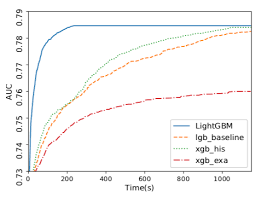


Lower memory usage: Replaces continuous values to discrete bins which result in lower memory usage.


Better accuracy than any other boosting algorithm: It produces much more complex trees by following leaf wise split approach rather than a level-wise approach which is the main factor in achieving higher accuracy. However, it can sometimes lead to overfitting which can be avoided by setting the max_depth parameter.


Compatibility with Large Datasets: It is capable of performing equally good with large datasets with a significant reduction in training time as compared to XGBOOST.


Parallel learning supported.